# NLP (Natural Language Processing)

Main pre-processing library = nltk <br>
Dowload all modules which is inside nltk by using nltk.download

In [4]:
import nltk
nltk.download()

In [3]:
para = '''Avul Pakir Jainulabdeen Abdul Kalam (/ˈæbdəl kəˈlɑːm/ (About this soundlisten); 15 October 1931 – 27 July 2015) was an Indian aerospace scientist who served as the 11th President of India from 2002 to 2007. He was born and raised in Rameswaram, Tamil Nadu and studied physics and aerospace engineering. He spent the next four decades as a scientist and science administrator, mainly at the Defence Research and Development Organisation (DRDO) and Indian Space Research Organisation (ISRO) and was intimately involved in India's civilian space programme and military missile development efforts.[1] He thus came to be known as the Missile Man of India for his work on the development of ballistic missile and launch vehicle technology.[2][3][4] He also played a pivotal organisational, technical, and political role in India's Pokhran-II nuclear tests in 1998, the first since the original nuclear test by India in 1974.[5]

Kalam was elected as the 11th President of India in 2002 with the support of both the ruling Bharatiya Janata Party and the then-opposition Indian National Congress. Widely referred to as the "People's President",[6] he returned to his civilian life of education, writing and public service after a single term. He was a recipient of several prestigious awards, including the Bharat Ratna, India's highest civilian honour.

While delivering a lecture at the Indian Institute of Management Shillong, Kalam collapsed and died from an apparent cardiac arrest on 27 July 2015, aged 83.[7] Thousands, including national-level dignitaries, attended the funeral ceremony held in his hometown of Rameswaram, where he was buried with full state honours.[8] '''

###  nltk.sent_tokenize

    It'll create sentences from the paragraph

In [4]:
sentence = nltk.sent_tokenize(para)

list

### nltk.word_tokenize

    it'll create words from the peragraph

In [26]:
word = nltk.word_tokenize(para)

## Stemming
<br>

            Stemming is a process in which we find out common word from all among the same kind of meaningful word. i.e. there is some words like final, finally then in stemming the common word from both of the words will be select in this case final is common word

In [6]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


## Stopwords module 
<br>
It is use for removing the words like (of, are, were, weren't) from the sentences


## Porterstemmer 
<br>
It is use for stemming the sentence

In [9]:
sentence = nltk.sent_tokenize(para)
stemmer = PorterStemmer()

# stemming 
for i in range(len(sentence)):
    words = nltk.word_tokenize(sentence[i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentence[i] = ' '.join(words)
    

## Lemmatizer

    It is a process in which a stemm word will get converted in a meaningful word 

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [20]:
sentence = nltk.sent_tokenize(para)
lemmatizer = WordNetLemmatizer()

for i in range(len(sentence)):
    words = nltk.word_tokenize(sentence[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentence[i] = ' '.join(words)
    
sentence = ''.join(sentence)

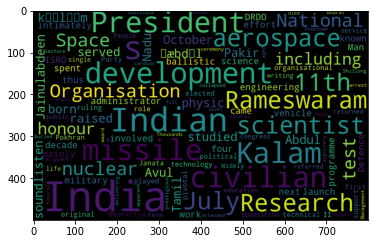

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 500, random_state = 1, max_font_size= 100).generate(sentence)
plt.imshow(wordcloud)

## BOW( Bag of Word)

    It creates a vocabulary of all the unique words occurring in all the documents in the training set.

## Sentiment analysis with BOW

In [2]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

para = input("Enter your commnet: ")
stemm = PorterStemmer()
lemmatizer = WordNetLemmatizer()
sentence = nltk.sent_tokenize(para)
corpus = []


# clean

Review = re.sub("[^'a-zA-Z]",' ', para) 
Review = Review.lower()
Review = Review.split()
Review = ' '.join(Review)


# vectorising

for i in range(len(sentence)):
    review = re.sub("[^'a-zA-Z]",' ', sentence[i]) 
    review = review.lower()
    review = review.split()
#     review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
    
# creating a bag of word

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
Review

Enter your commnet: india is great


'india is great'

This is positive comment


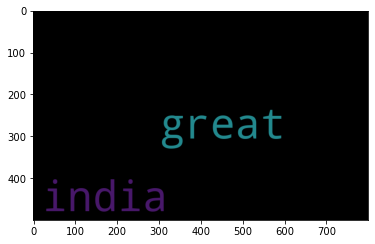

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
score = sid.polarity_scores(Review)

neg = score['neg']
pos = score['pos']

if neg > pos:
    print("This is negative comment")
elif pos > neg:
    print("This is positive comment")
    
else:
    print("This is nutral comment")

# print(score)
wordcloud = WordCloud(width = 800, height = 500, random_state = 1, max_font_size= 100).generate(Review)
plt.imshow(wordcloud)